<a href="https://colab.research.google.com/github/HardProxy/data-visualization/blob/main/QMX_7Analysis_CAP394.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final CAP-394

**Nome** : Otaviano da Cruz Neto

**Email** : otavianocruz@id.uff.br

Este projeto busca documentar e realizar a análise exploratória dos dados. A análise exploratória será fragmentada nas seguintes etapas :

- Organização e tratamento da base de dados
- Observar o comportamento relacional entre parâmetros dos dados.
- Utilização de técnicas de redução de dimensionalidade (SOM). 
- Utilização de técnicas para identificação de direções preferenciais (PCA)

**Documentação e Referências** : 
- QMX-7 - https://arxiv.org/pdf/2006.15139.pdf
- Pandas - https://pandas.pydata.org/docs/
- Matplotlib - https://matplotlib.org/stable/contents.html
- Sklearn - https://scikit-learn.org/stable/


## A base de dados



A base de dados contém 42 propriedades físico químicas locais e globais organizados em um dicionário. Totalizando 4.2 M de moléculas orgânicas pequenas dentro e fora do equilíbrio estrutural. Apresenta moléculas isômeras (mesma fórmula mas estruturas diferentes).

As 42 propriedades são indentificadas pelo seguinte formato 'Chave' : Descrição [Unidade de Medida] (Dimensionalidade) :

- 'atNUM' : Atomic numbers (N)
- 'atXYZ' : Atoms coordinates [Ang] (Nx3)
- 'sRMSD' : RMSD to optimized structure [Ang] (1)
- 'sMIT' : Momente of inertia tensor [amu.Ang^2] (9)
- 'ePBE0+MBD' : Total PBE0+MBD energy [eV] (1)
- 'eDFTB+MBD' : Total DFTB+MBD energy [eV] (1)
- 'eAT' : PBE0 atomization energy [eV] (1)
- 'ePBE0' : PBE0 energy [eV] (1)
- 'eMBD' : MBD energy [eV] (1)
- 'eTS' : TS dispersion energy [eV] (1)
- 'eNN' : Nuclear-nuclear repulsion energy [eV] (1)
- 'eKIN' : Kinetic energy [eV] (1)
- 'eNE' : Nuclear-electron attracttion [eV] (1)
- 'eEE' : Classical coulomb energy (el-el) [eV] (1)
- 'eXC' : Exchange-correlation energy [eV] (1)
- 'eX' : Exchange energy [eV] (1)
- 'eC' : Correlation energy [eV] (1)
- 'eXX' : Exact exchange energy [eV] (1)
- 'eKSE' : Sum of Kohn-Sham eigenvalues [eV] (1)
- 'KSE' : Kohn-Sham eigenvalues [eV] (depends on the molecule)
- 'eH' : HOMO energy [eV] (1)
- 'eL' : LUMO energy [eV] (1)
- 'HLgap' : HOMO-LUMO gap [eV] (1)
- 'DIP' : Total dipole moment [e.Ang] (1)
- 'vDIP' : Dipole moment components [e.Ang] (3)
- 'vTQ' : Total quadrupole moment components [e.Ang^2] (3)
- 'vIQ' : Ionic quadrupole moment components [e.Ang^2] (3)
- 'vEQ' : Electronic quadrupole moment components [eAng^2] (3)
- 'mC6' : Molecular C6 coefficient [hartree.bohr^6] (computed using SCS) (1)
- 'mPOL' : Molecular polarizability [bohr^3] (computed using SCS) (1)
- 'mTPOL' : Molecular polarizability tensor [bohr^3] (9)
- 'totFOR' : Total PBE0+MBD atomic forces (unitary forces cleaned) [eV/Ang] (Nx3)
- 'vdwFOR' : MBD atomic forces [eV/Ang] (Nx3)
- 'pbe0FOR' : PBE0 atomic forces [eV/Ang] (Nx3)
- 'hVOL' : Hirshfeld volumes [bohr^3] (N)
- 'hRAT' : Hirshfeld ratios (N)
- 'hCHG' : Hirshfeld charges [e] (N)
- 'hDIP' : Hirshfeld dipole moments [e.bohr] (N)
- 'hVDIP' : Components of Hirshfeld dipole moments [e.bohr] (Nx3)
- 'atC6' : Atomic C6 coefficients [hartree.bohr^6] (N)
- 'atPOL' : Atomic polarizabilities [bohr^3] (N)
- 'vdwR' : van der Waals radii [bohr] (N)



## Acessando os dados

Feito o download e colocando os dados no Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importação módulos necessários para a análise : 

In [ ]:
import h5py
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

Os dados são separados em grupo 7 diferentes arquivos e para acessá-los é necessário realizar a leitura de um arquivo `.hdf5`. Abaixo, iremos observar carregar apenas o arquivo `7000.hdf5`. 

In [ ]:
molid = "7000"
fMOL = h5py.File("/content/drive/MyDrive/INPE/QM7-X/"+molid+".hdf5","r")

Devido à alta dimensionalidade dos dados, no projeto só serão analisados aqueles parâmetros de dimensão 1, citados abaixo.

- 'ePBE0+MBD': Total PBE0+MBD energy [eV] (1)
- 'eDFTB+MBD': Total DFTB+MBD energy [eV] (1)
- 'eAT': PBE0 atomization energy [eV] (1)
- 'ePBE0': PBE0 energy [eV] (1)
- 'eMBD': MBD energy [eV] (1)
- 'eTS': TS dispersion energy [eV] (1)
-'eNN': Nuclear-nuclear repulsion energy [eV] (1)
-'eKIN': Kinetic energy [eV] (1)
-'eNE': Nuclear-electron attracttion [eV] (1)
-'eEE': Classical coulomb energy (el-el) [eV] (1)
-'eXC': Exchange-correlation energy [eV] (1)
-'eX': Exchange energy [eV] (1)
-'eC': Correlation energy [eV] (1)
-'eXX': Exact exchange energy [eV] (1)
-'eKSE': Sum of Kohn-Sham eigenvalues [eV] (1)
-'KSE': Kohn-Sham eigenvalues [eV] (depends on the molecule)
-'eH': HOMO energy [eV] (1)
-'eL': LUMO energy [eV] (1)
-'HLgap': HOMO-LUMO gap [eV] (1)
-'DIP': Total dipole moment [e.Ang] (1)


Cria-se listas para conter os 7 parâmetros de interesse :

In [ ]:
atHeavy = []
EPBE0 = []
EMBD = []
C6 = []
ENN = []
HLGAP = []
DIP = []
EEE = []

conf_ids = list(fMOL[molid].keys())
for confid in conf_ids:    
      ## get quantum mechanical properties and add them to properties buffer
      EPBE0.append(float(list(fMOL[molid][confid]['ePBE0'])[0]))
      EMBD.append(float(list(fMOL[molid][confid]['eMBD'])[0]))
      C6.append(float(list(fMOL[molid][confid]['mC6'])[0]))
      ENN.append(float(list(fMOL[molid][confid]['eNN'])[0]))
      HLGAP.append(float(list(fMOL[molid][confid]['HLgap'])[0]))
      DIP.append(float(list(fMOL[molid][confid]['DIP'])[0]))
      EEE.append(float(list(fMOL[molid][confid]['eEE'])[0]))

#Criando um dicionário para um dataframe
dict_data= {'EPBE0':EPBE0,'EMBD':EMBD,'C6':C6,'ENN':ENN,'HLGAP':HLGAP,'DIP':DIP,'EEE':EEE}

Aqui selecionamos os 7 parâmetros representantes de algumas propriedades das moléculas. Por exemplo, as chaves `ENN` e `EEE` representam a energia das interações `núcleo-núcleo` e `eletrón-elétron`, respectivamente, essas informações são importantes, pois o comportamento elestrostático de longo alcance é um indicador clássico de que o modelo está funcionando. Além disso, espera-se um comportamento linear entre as duas grandezas.



## Análise Exploratória

Cria-se um objeto da classes `DataFrame` para criar um banco de dados tabular relacionável.



In [ ]:
df = pd.DataFrame(data=dict_data)

###Scatter Plot Matrix

A primeira tentativa de visualização dos dados é a partir do `scatterplot matrix`. Nesse tipo de gráfico são geradas ilustrações que evidênciam o comportamento de cada parâmetro em função dos outros parâmetros restantes.

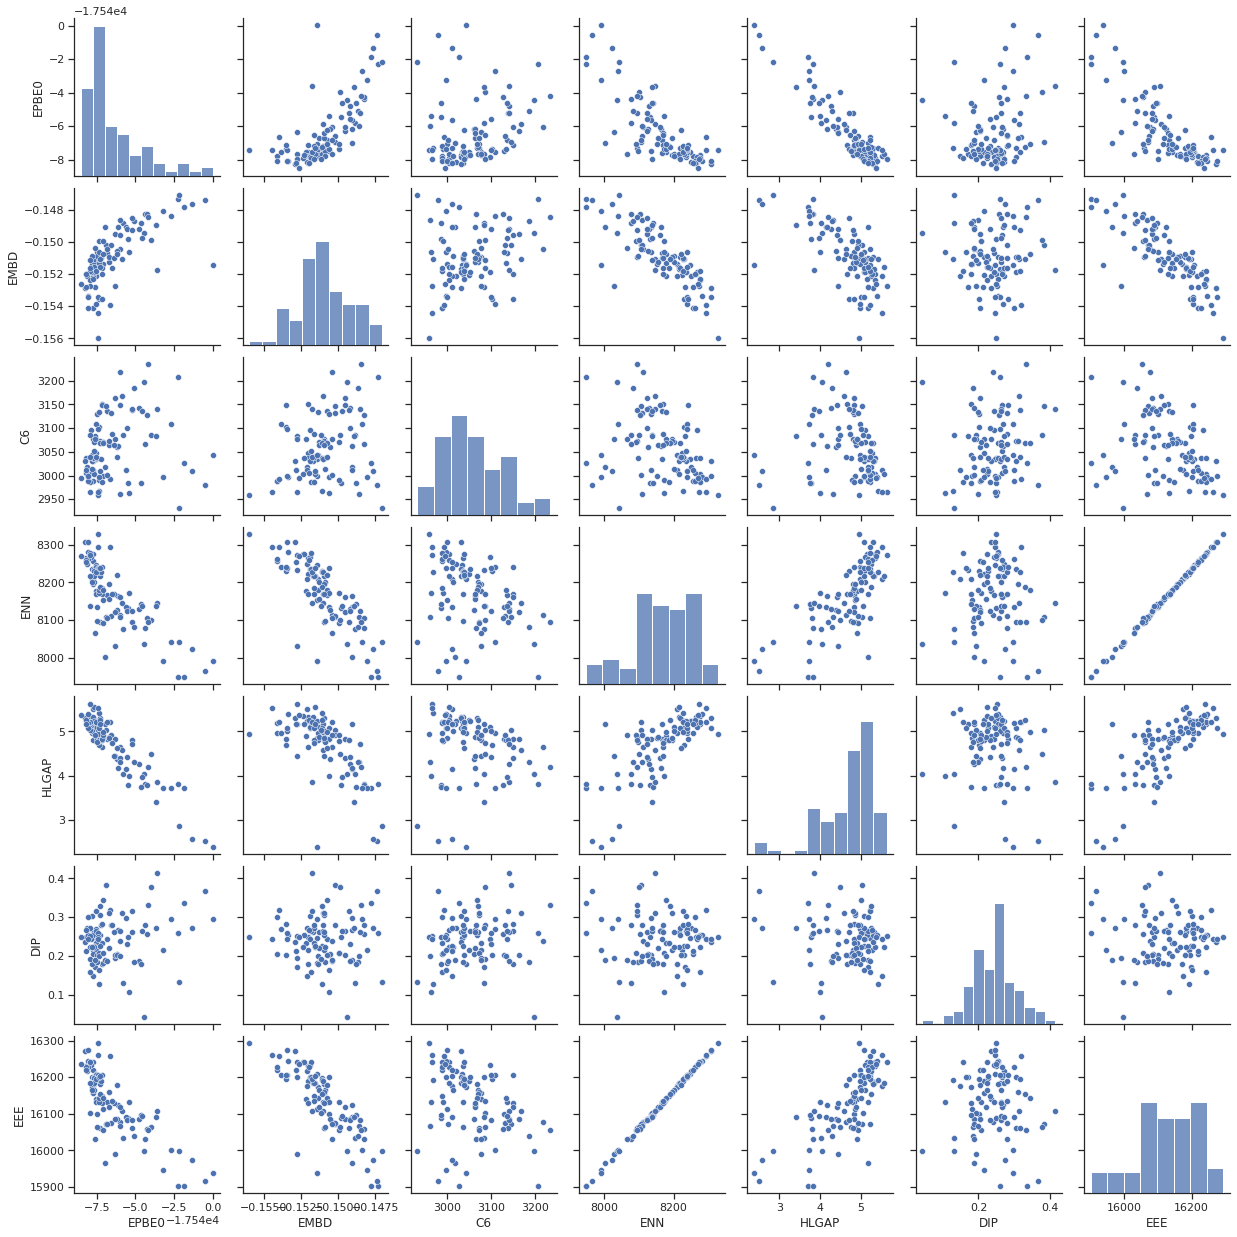

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df)

**Análise de Correlação** :

1. Aqui podemos observar o comportamento linear, já esperado, entre EEE (Classical coulomb energy (el-el)) e ENN (Nuclear-nuclear repulsion energy).

>$E_{el-el} = \dfrac{1}{4 \pi \epsilon_0}\dfrac{q_el^2}{(r_{el1} - r_{el2})^2}, $

onde $q_{el}$ é a carga do elétron, $r_{el1}$ e $r_{el2}$ são os vetores posições dos elétrons 1 e 2, respectivamente, e $\epsilon_0$ é a constante de permissividade elétrica do vácuo.

2. Outras relações de variáveis também pode ser aproximadas por uma reta :
- EEE x EMBD
- ENN x EMBD (Por consequência)
- HLGAP x EPBE0




Isso permite que possamos executar uma regressão linear e avaliar a taxa de erro quando aproximamos a correlação entre variáveis por um comportamento linear. 

###**EEE x EMBD** | **ENN x EMBD** :

Aplicando o algoritmo de regressão linear do Módulo Sklearn

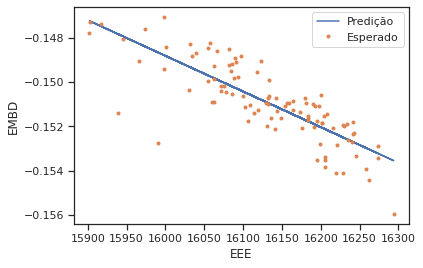

In [ ]:
from sklearn.linear_model import LinearRegression
#Adequação dos dados
aEEE = np.array(EEE).reshape(-1,1)
aEMBD = np.array(EMBD)

#Treinamento do Modelo
reg = LinearRegression().fit(aEEE,aEMBD)

#Medida de erro
#reg.score(aEEE, aEMBD)

#Predição
y_predE = reg.predict(aEEE)

#Plotting
plt.xlabel("EEE")
plt.ylabel("EMBD")
plt.plot(aEEE,y_predE)
plt.plot(aEEE,aEMBD,'.')
plt.legend(["Predição","Esperado"])

Aplicando essa mesma metodologia para o `ENN`, obtemos :

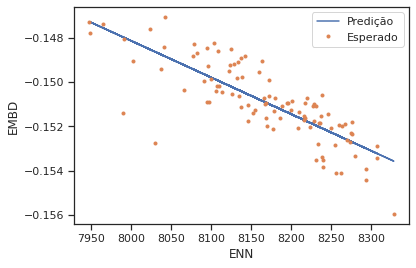

In [ ]:
from sklearn.linear_model import LinearRegression
#Adequação dos dados
aENN = np.array(ENN).reshape(-1,1)
aEMBD = np.array(EMBD)

#Treinamento do Modelo
reg = LinearRegression().fit(aENN,aEMBD)

#Medida de erro
#reg.score(aENN, aEMBD)

#Predição
y_predN = reg.predict(aENN)

#Plotting
plt.xlabel("ENN")
plt.ylabel("EMBD")
plt.plot(aENN,y_predN)
plt.plot(aENN,aEMBD,'.')
plt.legend(["Predição","Esperado"])

Colocando os dois plottings lado a lado :

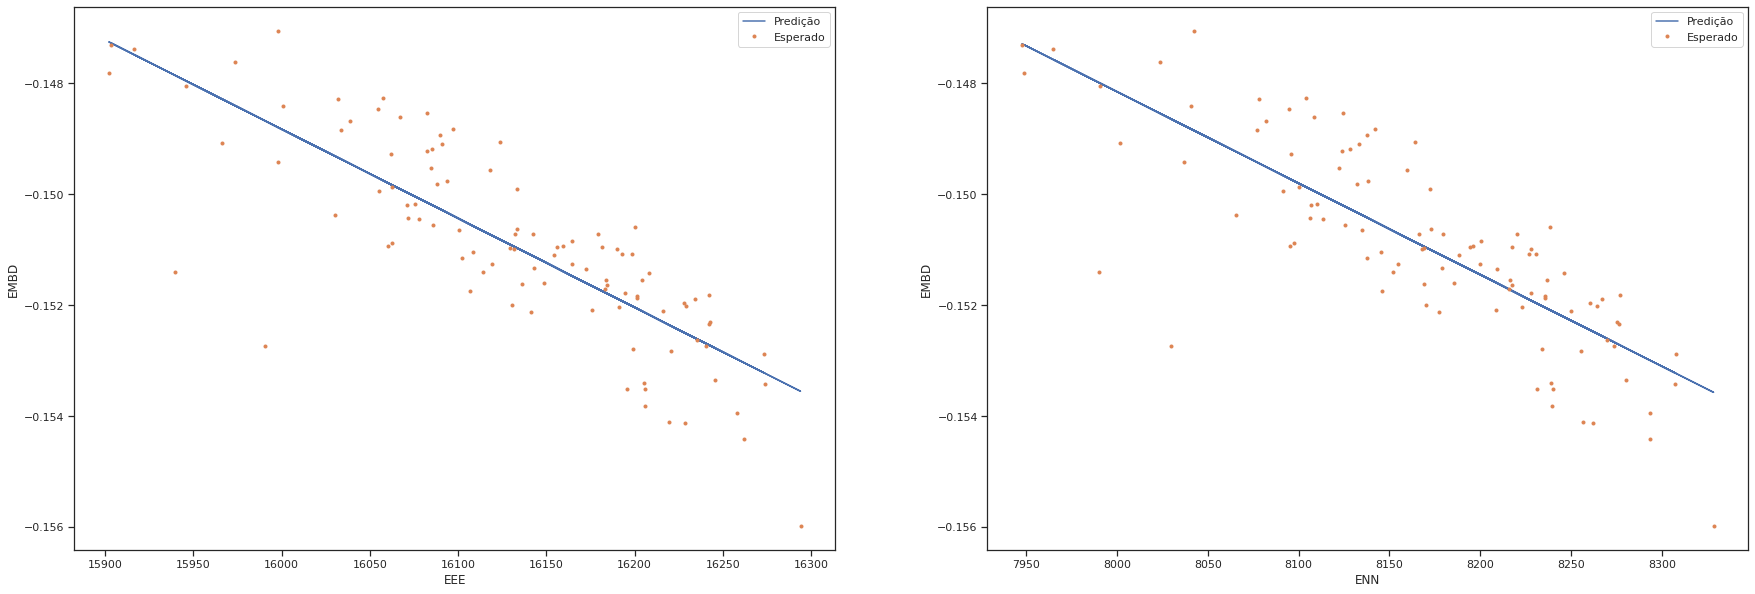

In [ ]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
plt.xlabel("EEE")
plt.ylabel("EMBD")
plt.plot(aEEE,y_predE)
plt.plot(aEEE,aEMBD,'.')
plt.legend(["Predição","Esperado"])
plt.subplot(1,2,2)
plt.xlabel("ENN")
plt.ylabel("EMBD")
plt.plot(aENN,y_predN)
plt.plot(aENN,aEMBD,'.')
plt.legend(["Predição","Esperado"])

Aqui observamos apenas um fator de escala de 2 no eixo x.

###HLGAP x EPBE0

Agora vamos realizar o mesmo procedimento de aplicação da Regressão Linear 

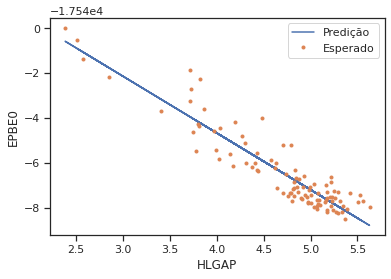

In [ ]:
from sklearn.linear_model import LinearRegression
#Adequação dos dados
aHLGAP = np.array(HLGAP).reshape(-1,1)
aEPBE0 = np.array(EPBE0)

#Treinamento do Modelo
reg = LinearRegression().fit(aHLGAP,aEPBE0)

#Medida de erro
#reg.score(aEEE, aEMBD)

#Predição
y_predGAP = reg.predict(aHLGAP)

#Plotting
plt.xlabel("HLGAP")
plt.ylabel("EPBE0")
plt.plot(aHLGAP,y_predGAP)
plt.plot(aHLGAP,aEPBE0,'.')
plt.legend(["Predição","Esperado"])

### Principal Componet Analysis (PCA)

O PCA é um procedimento matemático que utiliza uma
transformação ortogonal para converter um conjunto de
exemplos com variáveis linearmente correlacionadas em
um conjunto de exemplos formados por variáveis não
correlacionada linearmente

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
#PCA object
pca = PCA(n_components=2)
#Running PCA 
pca.fit(df)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.81312917 0.18654001]
[1257.22231966  602.16888631]


Transformação Linear que é responsável por :

In [ ]:
X_new = pca.transform(df)

Resultando no gráfico abaixo :

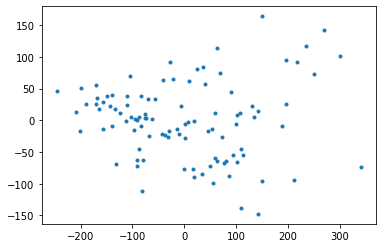

In [ ]:
plt.plot(X_new.T[0],X_new.T[1],'.')

Obs : **O que eu posso tirar desse resultado ?**

### Ampliando os horizontes

Aqui carregaremos todos os arquivos e ainda, para cada molécula, iremos identificar o elemento mais pesado como forma de classificá-las.

In [ ]:
ids = ['1000','2000','3000','4000','5000','6000','7000']
atHeavy = []
EPBE0 = []
EMBD = []
C6 = []
ENN = []
HLGAP = []
DIP = []
EEE = []

#Percorrendo todos os arquivos
for molid in ids: 
  fMOL = h5py.File("/content/drive/MyDrive/INPE/QM7-X/"+molid+".hdf5","r")
  conf_ids = list(fMOL[molid].keys())
  for confid in conf_ids:    
      ## get quantum mechanical properties and add them to properties buffer
      atHeavy.append(max(list(fMOL[molid][confid]['atNUM'])))
      EPBE0.append(float(list(fMOL[molid][confid]['ePBE0'])[0]))
      EMBD.append(float(list(fMOL[molid][confid]['eMBD'])[0]))
      C6.append(float(list(fMOL[molid][confid]['mC6'])[0]))
      ENN.append(float(list(fMOL[molid][confid]['eNN'])[0]))
      HLGAP.append(float(list(fMOL[molid][confid]['HLgap'])[0]))
      DIP.append(float(list(fMOL[molid][confid]['DIP'])[0]))
      EEE.append(float(list(fMOL[molid][confid]['eEE'])[0]))

#Criando um dicionário para um dataframe
dict_data= {'EPBE0':EPBE0,'EMBD':EMBD,'C6':C6,'ENN':ENN,'HLGAP':HLGAP,'DIP':DIP,'EEE':EEE,'atHeavy':atHeavy}
dict_data_noClass= {'EPBE0':EPBE0,'EMBD':EMBD,'C6':C6,'ENN':ENN,'HLGAP':HLGAP,'DIP':DIP,'EEE':EEE}

Com os dicionários criados coonseguimos construir 2 `DataFrames` :

In [ ]:
df = pd.DataFrame(data=dict_data_noClass)
df_class = pd.DataFrame(data=dict_data)

Acrescentando todos os arquivos e ainda classificando as moléculas com o rótulo do elemento mais pesado, construímos a seguinte `Scatter Plot Matrix` :

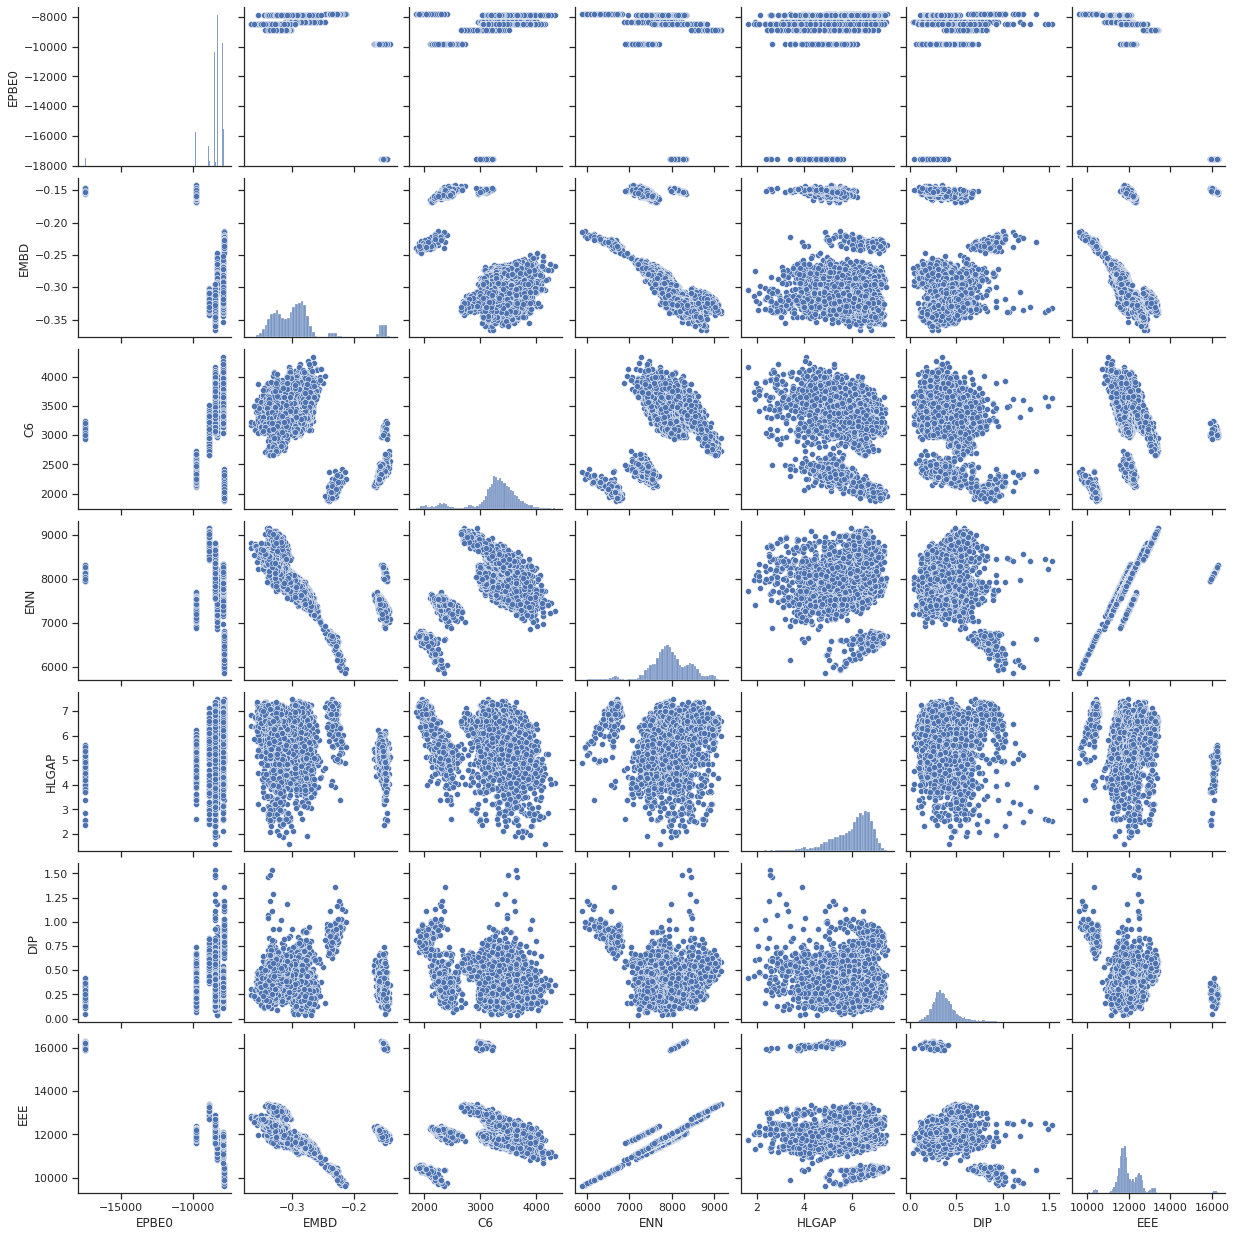

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df)

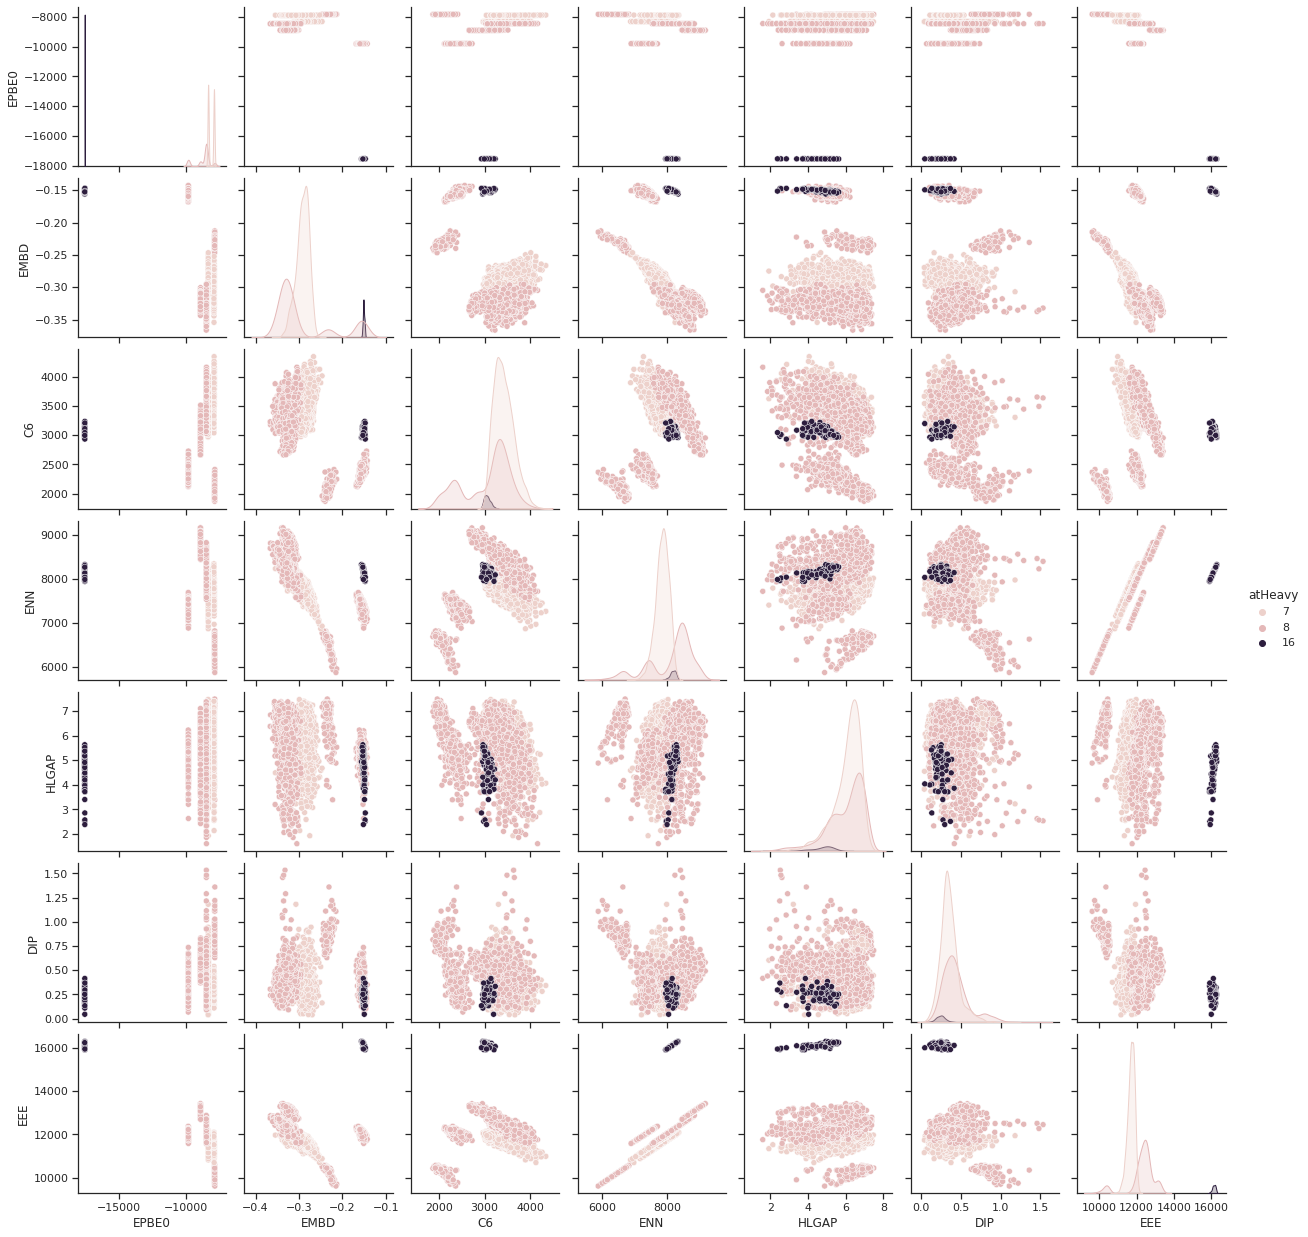

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
sns.pairplot(df_class, hue = "atHeavy")

### Novas formas de visualizar os dados!

Aqui buscamos observar e analisar o comportamento dos dados em 3 diferentes visualizações :

- Parallel Plotting
- Andrews Curves Plotting
- RadViz Plotting

#### Parallel Plotting

Foram criadas classes que representam o número atômico dos átomos mais pesados presentes nos compostos, ou seja,

- Número atômico 7 = Nitrogênio
- Número atômico 8 = Oxigênio
- Número atômico 16 = Enxofre

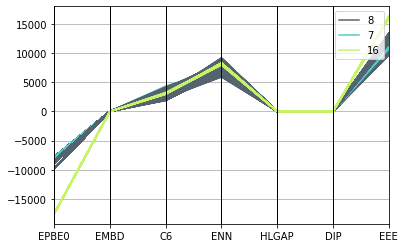

In [ ]:
pd.plotting.parallel_coordinates(df_class,"atHeavy",color=('#556270', '#4ECDC4', '#C7F464'))

Com o plotting de eixos paralelos podemos observar uma certa separabilidade da classe 16 em relação às outra clases para os atributos EPBE0 e EEE. 

#### Andrews Curves Plotting

As curvas de Andrews têm a forma funcional:

$ f(t) = x_1/sqrt(2) + x_2 sin(t) + x_3 cos(t) + x_4 sin(2t) + x_5 cos(2t) + … $

Onde $ x_i $ coeficientes correspondem aos valores de cada dimensão e t é linearmente espaçado entre $ - \pi $ e $ + \pi $. Cada linha do quadro corresponde a uma única curva.

**"Algo como uma Série de Fourier dos Dados"**

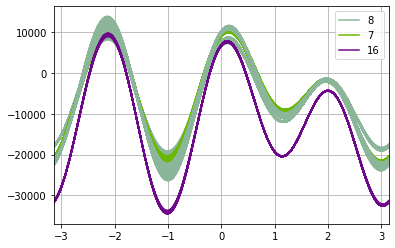

In [ ]:
pd.plotting.andrews_curves(df_class, 'atHeavy')

Esse tipo de visualização busca evidenciar o carater de variabilidade dos dados dentro de todas as classes. Esse método mostra as projeções dos pontos nas base de fourier.

Ou seja, há distinguibilidade entre a classe 16 em relação às duas outras( 7 e 8 ). Isso mostra que há pouca diferença nos atributos em compostos que têm o número atômico do elemento mais pesado próximo.


#### RadViz

Cada série no DataFrame é representada como uma fatia uniformemente distribuída em um círculo. Cada ponto de dados é renderizado no círculo de acordo com o valor de cada série. Séries altamente correlacionadas no DataFrame são colocadas mais próximas do círculo unitário.

RadViz permite projetar um conjunto de dados N-dimensionais em um espaço 2D onde a influência de cada dimensão pode ser interpretada como um equilíbrio entre a influência de todas as dimensões.

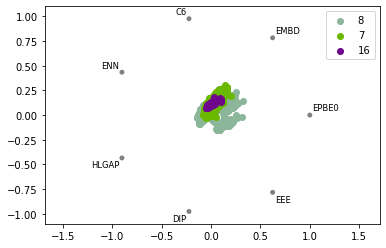

In [ ]:
pd.plotting.radviz(df_class, 'atHeavy')

Obs : **O que eu posso tirar desse resultado ?**